## Analyze how ranging the delta parameter changes the results of the subset size

In [1]:
import os
import time
import math
from representative_subset import greedy_representative_subset, greedy_representative_subset_v2, global_alignment_score, score
from data_io import parse_fasta, write_fasta
from alignment_viewer import view_alignment
import random
from Bio import AlignIO, SeqIO
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datasets_folder = './data'
aligned_datasets = {
    'H1N1': 'H1N1_Aligned.fasta',
    'H3N2': 'H3N2_Aligned.fasta',
    'H5N1': 'H5N1_Aligned.fasta',
    'H9N2': 'H9N2_Aligned.fasta',
}

In [3]:
ds = np.arange(25, 91, 1)
results = {}
for dataset in aligned_datasets:
    print(f"Dataset {dataset}:")
    input_path = os.path.join(datasets_folder, aligned_datasets[dataset])    
    sequences = parse_fasta(input_path)
    l_s = len(sequences[0])
    d_list = []
    subset_size_list = []
    for d in ds:
        this_d = l_s * d // 100
        subset = greedy_representative_subset(sequences, d = this_d)
        d_list.append(d)
        subset_size_list.append(len(subset))
    results[dataset] = [d_list, subset_size_list]

Dataset H1N1:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2028/2028 [00:01<00:00, 1045.41it/s]


Dataset H3N2:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1431/1431 [00:00<00:00, 3269.21it/s]


Dataset H5N1:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1793/1793 [00:36<00:00, 49.08it/s]


Dataset H9N2:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2924/2924 [01:12<00:00, 40.17it/s]


## Plot Results

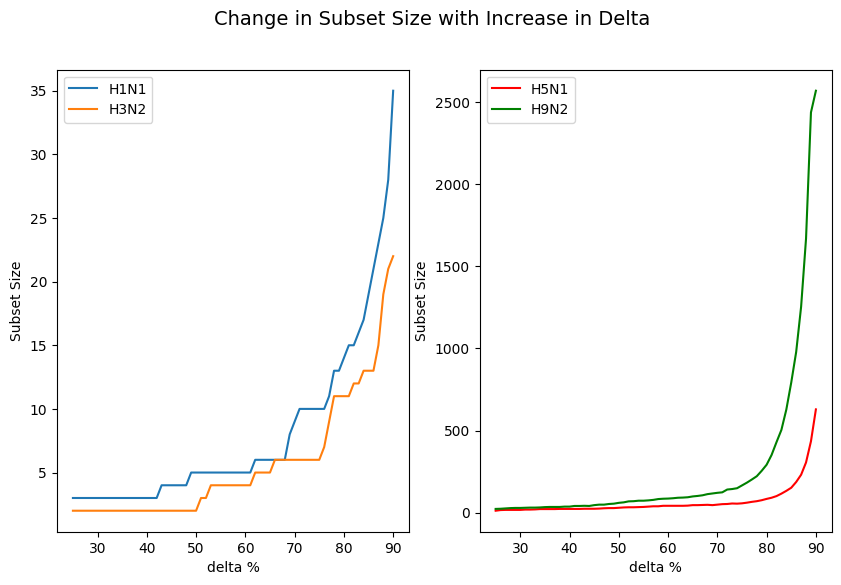

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))
ax1.plot(results["H1N1"][0], results["H1N1"][1], label = "H1N1")
ax1.plot(results["H3N2"][0], results["H3N2"][1], label = "H3N2")
ax1.set_xlabel("delta %")
ax1.set_ylabel("Subset Size")
ax1.legend()
ax2.plot(results["H5N1"][0], results["H5N1"][1], color = "red", label = "H5N1")
ax2.plot(results["H9N2"][0], results["H9N2"][1], color = "green", label = "H9N2")
ax2.legend()
fig.suptitle('Change in Subset Size with Increase in Delta', fontsize = 14)
ax2.set_xlabel("delta %")
ax2.set_ylabel("Subset Size")
plt.show()